# clustering

## Importing libraries

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

import pickle

In [4]:
#data for prediction
columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

In [5]:
k_data = pd.read_csv('kaggle_data.csv')
k_data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [6]:
k_data_copy = k_data.copy()
data = k_data_copy[columns]
data = data.dropna()
data.info()
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170653 entries, 0 to 170652
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   danceability      170653 non-null  float64
 1   energy            170653 non-null  float64
 2   key               170653 non-null  int64  
 3   loudness          170653 non-null  float64
 4   mode              170653 non-null  int64  
 5   speechiness       170653 non-null  float64
 6   acousticness      170653 non-null  float64
 7   instrumentalness  170653 non-null  float64
 8   liveness          170653 non-null  float64
 9   valence           170653 non-null  float64
 10  tempo             170653 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 15.6 MB


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.279,0.211,10,-20.096,1,0.0366,0.98200,0.878000,0.6650,0.0594,80.954
1,0.819,0.341,7,-12.441,1,0.4150,0.73200,0.000000,0.1600,0.9630,60.936
2,0.328,0.166,3,-14.850,1,0.0339,0.96100,0.913000,0.1010,0.0394,110.339
3,0.275,0.309,5,-9.316,1,0.0354,0.96700,0.000028,0.3810,0.1650,100.109
4,0.418,0.193,3,-10.096,1,0.0380,0.95700,0.000002,0.2290,0.2530,101.665
...,...,...,...,...,...,...,...,...,...,...,...
170648,0.786,0.808,7,-3.702,1,0.0881,0.08460,0.000289,0.0822,0.6080,105.029
170649,0.717,0.753,7,-6.020,1,0.0605,0.20600,0.000000,0.1010,0.7340,137.936
170650,0.634,0.858,4,-2.226,0,0.0809,0.10100,0.000009,0.2580,0.6370,91.688
170651,0.671,0.623,2,-7.161,1,0.3080,0.00998,0.000008,0.6430,0.1950,75.055


In [7]:
X_prep = StandardScaler().fit_transform(data)
X_prep

array([[-1.46701268, -1.01398836,  1.36558797, ...,  2.6267188 ,
        -1.7828247 , -1.16930675],
       [ 1.59877887, -0.5282702 ,  0.5121232 , ..., -0.26222865,
         1.65068832, -1.82117959],
       [-1.18882049, -1.18212158, -0.62582982, ..., -0.59974924,
        -1.858821  , -0.21240379],
       ...,
       [ 0.5484614 ,  1.40339359, -0.34134156, ...,  0.29839878,
         0.41194856, -0.81976118],
       [ 0.75852489,  0.52536459, -0.91031807, ...,  2.50086366,
        -1.26756976, -1.36140375],
       [ 1.80884237,  0.89152137,  0.5121232 , ..., -0.13637351,
         0.43094764, -0.71220119]])

In [8]:
kmeans = KMeans(n_clusters=100, n_init=10,  
                max_iter=10, random_state=42)
kmeans.fit(X_prep)
    #8 is chosen later as optimal - elbow method


KMeans(max_iter=10, n_clusters=100, random_state=42)

In [9]:
clusters = kmeans.predict(X_prep)

In [10]:
clusters

array([ 3, 51, 53, ..., 22, 36, 57], dtype=int32)

In [11]:
counts = pd.Series(clusters).value_counts().sort_index()
counts

0     2503
1     1211
2     2379
3      690
4     2460
      ... 
95    1227
96    2199
97     860
98    1699
99    1939
Length: 100, dtype: int64

In [12]:
min(counts)

535

In [13]:
max(counts)

3430

In [14]:
X_df = pd.DataFrame(data)
X_df["cluster"] = clusters    
X_df.to_csv('top_features_prediction_kaggle.csv')

In [15]:
def train_model(data):
    
    X = data.drop(columns = 'cluster')
    y = data['cluster']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    return model 

In [16]:
model_k = train_model(X_df)

In [20]:
prediction = model_k.predict(x_p)

In [21]:
prediction 

array([33], dtype=int32)

In [97]:
with open('my_kaggle_model_100.pkl', 'wb') as file: 
    pickle.dump(model_k, file)

In [98]:
#saving dataframe for predictions: 

In [99]:
k_data_copy = k_data.copy()

In [100]:
k_data['cluster'] = clusters

In [101]:
k_data

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,cluster
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,3
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,51
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339,53
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109,30
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029,57
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936,57
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688,22
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055,36


In [102]:
k_data.to_csv('kaggle_data_predictions_100.csv')

In [18]:
import sys
from Credentials import * #name of file 

import spotipy #spotify API 
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= Client_ID,
                                                           client_secret= Client_Secret))

def  get_audio_features(song_name, artist, music_features):
    
    #form query for the song with the artist filer
    results = sp.search(q = song_name+' artist:'+artist)
    
    #taking item [0] as best match 
    #returns dict within a list; dictionary is one element of the list - hence [0] in the end
    features = (sp.audio_features(results["tracks"]["items"][0]["uri"]))[0]
    
    #only leaving the features we want - music_features
    unwanted =  set(features) - set(music_features)
    for unwanted_key in unwanted: 
        del features[unwanted_key]
    
    #to create df after - replacing values with lists
    for key, value in features.items():
        value_list = []
        value_list.append(value)
        features[key] = value_list
    
    feature_dataframe = pd.DataFrame(features)
    
    return feature_dataframe

In [19]:
song_name = 'Mood'
artist = '24kgoldn iann dio'
music_features = ['danceability', 'energy', 'key',
  'loudness',
  'mode',
  'speechiness',
  'acousticness',
  'instrumentalness',
  'liveness',
  'valence',
  'tempo']

x_p = get_audio_features(song_name, artist, music_features)
x_p

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.7,0.722,7,-3.558,0,0.0369,0.221,0,0.272,0.756,90.989


## Choosing the parameters

**init**: those are the different initialization strategies. By default, sklearn is already using a 'smart' method, not the totally random one we saw.

**n_init**: By default, Scikit-Learn has tried 10 different random initializations and kept the best model.

[Scikitlearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

How does Scikit-Learn know which model is the best? It uses a performance metric called **inertia**. **It is the mean squared distance between each instance and its closest centroid**. It's stored in the inertia_ attribute of the model.

In [9]:
kmeans.inertia_

938.6711756898961

**max_iter**: It iterates up to 300 times by default (those are the re-computing centroids iterations we saw earlier)

**tol**: This is a way to determine when to stop iterating (if the clusters have changed only veeeery slightly, we assume we have achieved 'convergence')

**algorithm**: There are variations in the implementation of most algorithms and K-Means is no exception. By default, we're using a 'smart' implementation called elkan.

For learning purposes, we will tweak the parameters to replicate the good ol' K-Means - a bit dumber than the Scikit-Learn, yes, but also the original.

In [27]:
kmeans = KMeans(n_clusters=4,
                init="random",
                n_init=100,  
                max_iter=10,
                tol=0,
                algorithm="full",
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

725.232402885714


Play with the parameters of K-means and see how that affects the inertia result. You can create for loops to try different combinations of parameters.

In [26]:
for i in [1, 4, 6, 8, 20, 30, 100]: 
    print('n_init = ',i)
    for j in [2, 10, 25, 100]:
        kmeans = KMeans(n_clusters=4,
                        init="random",
                        n_init= i,  # try with 1, 4, 8, 20, 30, 100...
                        max_iter= j,
                        tol=0,
                        algorithm="full",
                        random_state=1234)
        kmeans.fit(X_prep)
        print('max_iter =', j,'----- inert = ', kmeans.inertia_)

n_init =  1
max_iter = 2 ----- inert =  775.1660482112557
max_iter = 10 ----- inert =  759.1498960336228
max_iter = 25 ----- inert =  759.1498960336228
max_iter = 100 ----- inert =  759.1498960336228
n_init =  4
max_iter = 2 ----- inert =  775.1660482112557
max_iter = 10 ----- inert =  755.0597391240796
max_iter = 25 ----- inert =  755.0597391240796
max_iter = 100 ----- inert =  755.0597391240796
n_init =  6
max_iter = 2 ----- inert =  775.1660482112557
max_iter = 10 ----- inert =  755.0597391240796
max_iter = 25 ----- inert =  755.0597391240796
max_iter = 100 ----- inert =  755.0597391240796
n_init =  8
max_iter = 2 ----- inert =  775.1660482112557
max_iter = 10 ----- inert =  755.0597391240796
max_iter = 25 ----- inert =  755.0597391240796
max_iter = 100 ----- inert =  755.0597391240796
n_init =  20
max_iter = 2 ----- inert =  775.1660482112557
max_iter = 10 ----- inert =  755.0597391240796
max_iter = 25 ----- inert =  755.0597391240796
max_iter = 100 ----- inert =  755.0597391240796

## Chosing K

We have used K=8 by default for now - but we know that 8 might not be the optimal numbner of clusters for our dataset. Having a metric like inertia, we can compute it for several K values and then use the "elbow method" to choose the best K.

We will now leave all other parameters with their default value, since it seems to work pretty well.

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

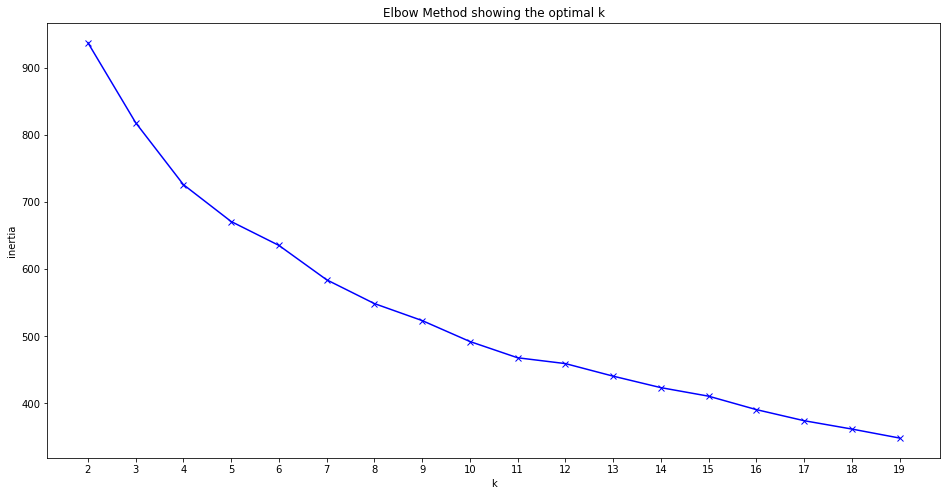

In [36]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

There seems to be an elbow at **k=3**, and then a very slight one at k=10, but other than that the plot is quite smooth. What if our business needs involv having a k between 5 and 8?

There is another metric that will help us decide.

## Silouhette

There's a metric called **Silhouette Score** that also measures how similar is an observation is to its own cluster compared to other clusters. For the ith observation, the **Silhouette Score** is:

$$s_{K,L} = (b - a) / max(a,b) $$

Where:

a = mean intra-cluster distance (the average distance between i and every other observation in the cluster where i belongs)

$$ a = \frac{1}{n_{K}}\sum_{i,j\neq{i}}^{n_{K}}d(i,j)$$

b = mean **nearest-cluster** distance (the average distance between i and the observations of the nearest cluster that i is not part of it)

$$ b = \frac{1}{(n_{K}*n_{L})}\sum_{i}^{n_{K}}\sum_{j}^{n_{L}}d(i,j)$$

The silhouette score for the whole model is the **average of all the silhouette scores** of each instance.

$$ S = \frac{2}{N(N-1)}\sum_{c}s_{K,L}$$

Because we divide the substraction of (b-a) by the max of the two distances (which will always be b unless the observation has been wrongly assigned to a cluster it should not belong), we obtain a "normalized score", that ranges from -1 to 1, and that makes it easier to interpret.

In [34]:
K = range(2, 10)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))
    print(k)

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

KeyboardInterrupt: 

The greater the Silouhette, the greater the separation between the clusters, In other words, the clusters will be more defined.

Here, we confirm that 3 is the best option, but we also notice that 5 a quite good - it meets the 'technical criteria' of having a better score than its predecessor (4), so if it falls within the range of our business demands - it looks like the best candidate.